<a href="https://colab.research.google.com/github/ixd-ai-hub/Research-Ground/blob/feature%2FCU-865d7myr5-shelf-object-detection/Shelf_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:
# install SAM model
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-h96zjfz9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-h96zjfz9
  Resolved https://github.com/facebookresearch/segment-anything.git to commit c1910835a32a05cbb79bdacbec8f25914a7e3a20
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36602 sha256=e26e389b6afd4488800240002b150fe454a1fad03c83cd361d0e0d20953c1fd2
  Stored in directory: /tmp/pip-ephem-wheel-cache-i2xhj54c/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything


In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.3 MB/s eta 0:00:00


In [ ]:
# dowload SAM weights
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
#  Load Model
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
#  Automatic Mask Generation
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
# Load Image
import os

IMAGE_NAME = "/content/shell1.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

In [ ]:
# Generate mask with SAM
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

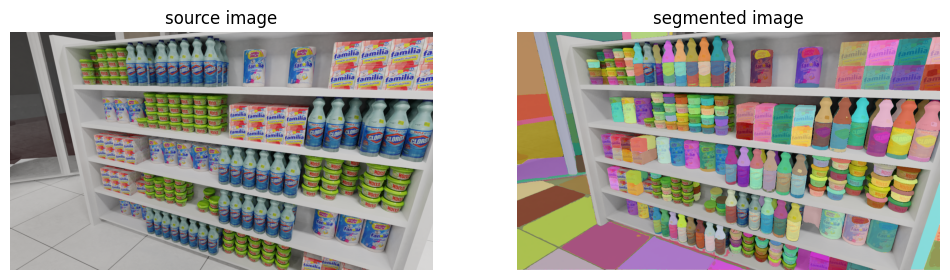

In [ ]:
# Plot Annotation Mask
mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
sam_result

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 7050,
  'bbox': [1057, 568, 95, 98],
  'predicted_iou': 1.0052896738052368,
  'point_coords': [[1100.0, 663.75]],
  'stability_score': 0.9867493510246277,
  'crop_box': [0, 0, 1280, 720]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 5543,
  'bbox': [915, 536, 78, 

In [ ]:
type(sam_result)

list

In [ ]:
import pickle

In [ ]:
with open("/content/sam_result.pickle", 'wb') as pf:
  pickle.dump(sam_result, pf)

In [ ]:
len(sam_result)

350

---

In [ ]:
import pickle
import os
import cv2
# import supervision as sv
import matplotlib.pyplot as plt
import torch

In [ ]:
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:
IMAGE_NAME = "/content/shell1.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

In [ ]:
image_bgr = cv2.imread(IMAGE_NAME)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

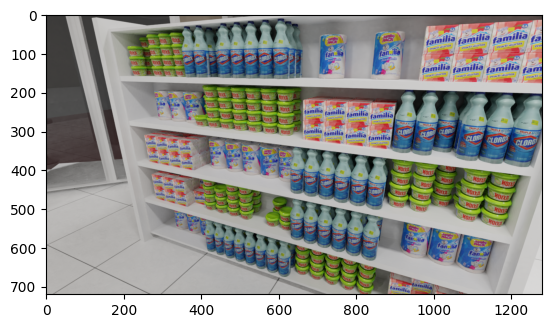

In [ ]:
plt.imshow(image_rgb)

In [ ]:
with open('/content/drive/MyDrive/temp/sam_result.pickle', 'rb') as pf:
  data = pickle.load(pf)

In [ ]:
data

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 7050,
  'bbox': [1057, 568, 95, 98],
  'predicted_iou': 1.0052896738052368,
  'point_coords': [[1100.0, 663.75]],
  'stability_score': 0.9867493510246277,
  'crop_box': [0, 0, 1280, 720]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 5543,
  'bbox': [915, 536, 78, 

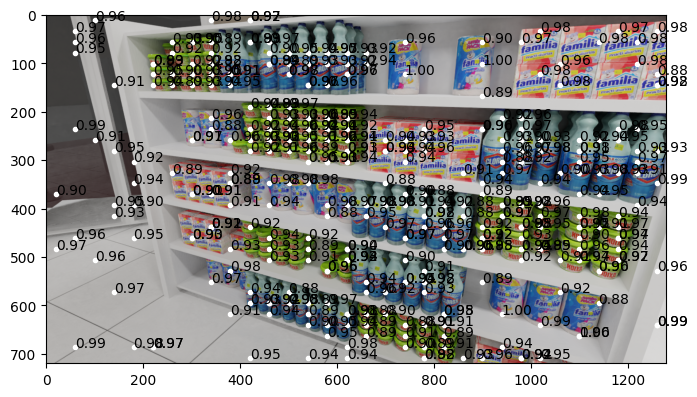

In [ ]:
plt.figure(figsize=(8,10))
for c in data:
  x,y = c['point_coords'][0]
  plt.plot(int(x), int(y), marker='.', color="white")
  plt.text(int(x), int(y), str(c['predicted_iou'])[:4])
plt.imshow(image_rgb)
plt.show()

In [ ]:
from matplotlib.patches import Rectangle
from PIL import Image

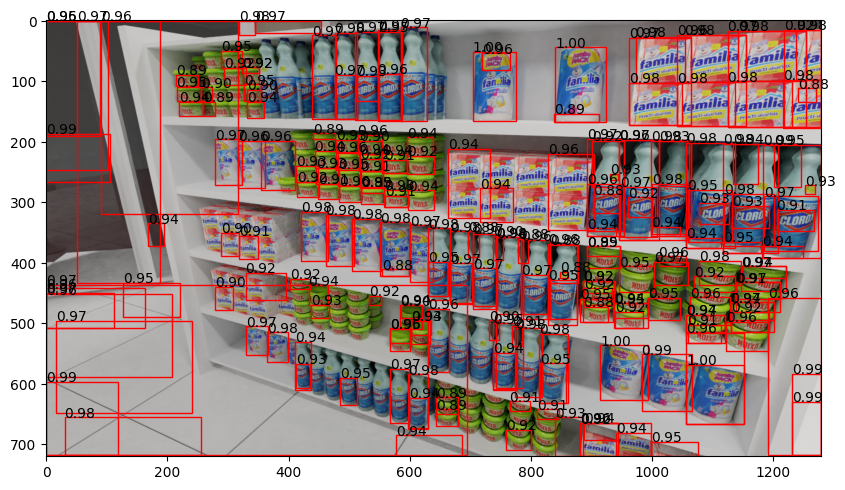

In [ ]:
plt.figure(figsize=(10,12))
for c in data:
  x,y,w,h = c['bbox']
  if (c['stability_score'] >= 0.97):
    plt.gca().add_patch(Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none'))
    plt.text(int(x), int(y), str(c['predicted_iou'])[:4])
plt.imshow(image_rgb)
plt.show()

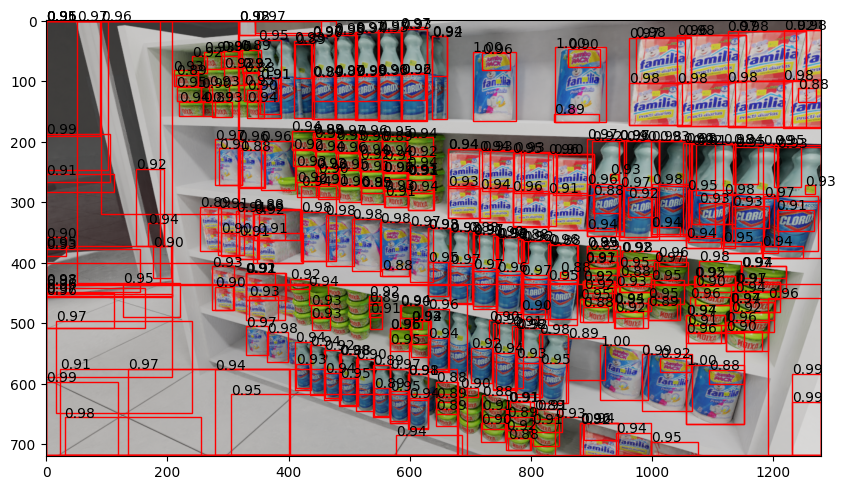

In [ ]:
plt.figure(figsize=(10,12))
for c in data:
  x,y,w,h = c['bbox']
  plt.gca().add_patch(Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none'))
  plt.text(int(x), int(y), str(c['predicted_iou'])[:4])
plt.imshow(image_rgb)
plt.show()

In [ ]:
from PIL import Image
img = Image.open(IMAGE_NAME).convert('RGB')

In [ ]:
# im_crop = im.crop((left, upper, right, lower))
for i,c in enumerate(data):
  x,y,w,h = c['bbox']
  img.crop((x, y, x+w, h+y)).save(f'/content/croped_images/{i}.jpg', format='JPEG')


In [ ]:
# !zip -r filename.zip /content/croped_images

---

In [ ]:
!pip install imagededup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.6/173.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


---

In [ ]:
!unzip /content/base.zip -d /content/base

Archive:  /content/base.zip
   creating: /content/base/base/
  inflating: /content/base/base/bleaching.jpg  
  inflating: /content/base/base/cream.jpg  
  inflating: /content/base/base/powder.jpg  
  inflating: /content/base/base/soup.jpg  


---

In [ ]:
from imagededup.methods import CNN

In [ ]:
myencoder = CNN()
encoding = myencoder.encode_image(image_file='/content/base/base/bleaching.jpg')

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 92.1MB/s]
2023-04-15 13:51:19,806: INFO Initialized: MobileNet v3 pretrained on ImageNet dataset sliced at GAP layer
INFO:imagededup.methods.cnn:Initialized: Mobil

In [ ]:
encoding.shape

(1, 576)

In [ ]:
myencoder = CNN()
encoding_map = myencoder.encode_images(image_dir='/content/base/base')

2023-04-15 13:51:20,100: INFO Initialized: MobileNet v3 pretrained on ImageNet dataset sliced at GAP layer
INFO:imagededup.methods.cnn:Initialized: MobileNet v3 pretrained on ImageNet dataset sliced at GAP layer
2023-04-15 13:51:20,104: INFO Device set to cpu ..
INFO:imagededup.methods.cnn:Device set to cpu ..
2023-04-15 13:51:20,111: INFO Start: Image encoding generation
INFO:imagededup.methods.cnn:Start: Image encoding generation
2023-04-15 13:51:20,185: INFO End: Image encoding generation
INFO:imagededup.methods.cnn:End: Image encoding generation


In [ ]:
encoding_map.keys()

dict_keys(['bleaching.jpg', 'cream.jpg', 'powder.jpg', 'soup.jpg'])

In [ ]:
encoding_map['bleaching.jpg'].shape

(576,)

In [ ]:
encoding_map.values()

In [ ]:
labels, feats = [], []
for k,v in encoding_map.items():
  labels.append(k.split('.')[0])
  feats.append(v)

feats = np.array(feats)
feats.shape

(4, 576)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from glob import glob

In [ ]:
for f in glob('/content/croped_images/*.jpg'):
  vec = myencoder.encode_image(image_file=f)
  sims = cosine_similarity(feats, vec)
  lbl = np.argmax(sims)
  print(f, sims[lbl], labels[lbl])
  # print(f)

/content/croped_images/184.jpg [0.9307072] soup
/content/croped_images/230.jpg [0.6408859] cream
/content/croped_images/300.jpg [0.4839933] bleaching
/content/croped_images/80.jpg [0.8738902] cream
/content/croped_images/71.jpg [0.8376831] cream
/content/croped_images/269.jpg [0.66132843] powder
/content/croped_images/72.jpg [0.8217058] cream
/content/croped_images/79.jpg [-0.01543397] powder
/content/croped_images/33.jpg [0.8752228] powder
/content/croped_images/204.jpg [0.6777196] powder
/content/croped_images/52.jpg [0.97268045] bleaching
/content/croped_images/116.jpg [0.8281698] cream
/content/croped_images/63.jpg [0.92706466] bleaching
/content/croped_images/74.jpg [0.7701076] cream
/content/croped_images/264.jpg [0.06402759] powder
/content/croped_images/167.jpg [0.19182163] cream
/content/croped_images/271.jpg [0.45582715] bleaching
/content/croped_images/338.jpg [0.8015407] cream
/content/croped_images/310.jpg [0.36675683] bleaching
/content/croped_images/95.jpg [0.83324695] p

In [ ]:
vec1 = myencoder.encode_image(image_file='/content/croped_images/0.jpg')

In [ ]:
np.argmax(cosine_similarity(feats, vec1))

2

In [ ]:
dists = {}
for k,v in encoding_map.items():
  print(vec1[0].shape, v.shape, cosine_similarity(vec1, v[np.newaxis, :]), k)
  # dists[k] = cosine_similarity(vec1[0], v)

# dists

(576,) (576,) [[0.70561624]] bleaching.jpg
(576,) (576,) [[0.62224495]] cream.jpg
(576,) (576,) [[0.89346254]] powder.jpg
(576,) (576,) [[0.73024404]] soup.jpg


In [ ]:
color_dict = dict(zip(labels, ['b','r','g','w']))
color_dict

{'bleaching': 'b', 'cream': 'r', 'powder': 'g', 'soup': 'w'}

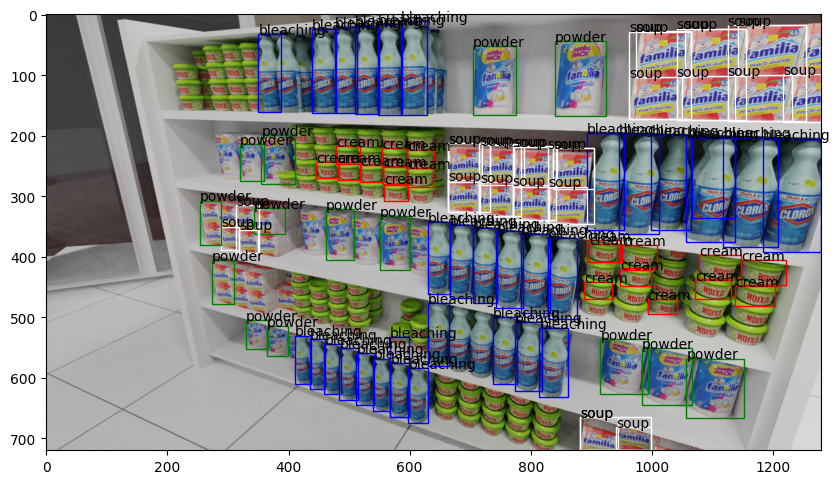

In [ ]:
plt.figure(figsize=(10,12))
for c in data:
  x,y,w,h = c['bbox']

  # plt.text(int(x), int(y), str(c['predicted_iou'])[:4])
  f = image_rgb[y:y+h, x:x+w, :]
  # print(f.shape, x,y,w,h, image_rgb.shape)
  vec = myencoder.encode_image(image_array=f)
  sims = cosine_similarity(feats, vec)
  lbl = np.argmax(sims)
  cls = labels[lbl]
  # print(f, sims[lbl], labels[lbl])
  if sims[lbl] > 0.82:
    plt.gca().add_patch(Rectangle((x,y),w,h,linewidth=1,edgecolor=color_dict[cls],facecolor='none'))
    plt.text(int(x), int(y), cls)


plt.imshow(image_rgb)
plt.show()

---
Finalized Object Detection